# ¡Hola Cynthia!

Mi nombre es Sofia Arboleda, estaré ayudándote a revisar este proyecto para que quede en su mejor versión.

Para simular la dinámica de un ambiente de trabajo, si veo algún error, en primer instancia solo los señalaré, dándote la oportunidad de encontrarlos y corregirlos por tu cuenta. Esto es útil para que te acostumbres a un escenario laboral. En caso de que no puedas resolver la tarea, te daré una información más precisa en la próxima revisión.

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo funciona esta revisión? Leeré atentamente tu código y te señalaré tus fortalezas y aquellas cosas que podemos mejorar. Los comentarios aparecerán de esta forma:


<div class="alert alert-block alert-success">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si todo está perfecto y no se requieren cambios en el código.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta. Se aceptan uno o dos comentarios de este tipo en el borrador, pero si hay más, deberás hacer las correcciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de la revisora</b> <a class="tocSkip"></a>

Si definitivamente hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma si algo no queda claro (copia este código en una celda markdown):

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola, muchas gracias por tus comentarios y la revisión.        
</div>

**Es un gusto acompañarte en este proceso, ¡empecemos!**

## Proyecto ICE

Para poder iniciar este análisis se importan las librerías que posiblemente se utilicen durante este proyecto. Se abre el archivo, y se obtiene la información necesaria para poder trabajar con los datos por medio de .info(), .head(), y shape. 

### Comentario General Iteración #1
<div class="alert alert-block alert-warning">

Cynthia, quería dejarte aquí una apreciación general de tu proyecto para que a partir de allí nos vayamos punto por punto. 

Respecto a tu trabajo en esta primera iteración, has mostrado tus conocimientos de la mejor forma, utilizando los metodos correctamente, realizando filtros de forma sencilla y trabajando con las pruebas estadisticas en el dataset para llegar a las respuestas de negocio que se buscaban en este proyecto. Solo quedan algunas recomendaciones de mejora que te servirán para tus entregas a futuro y corregir el desarrollo, en especial, el reemplazo que hiciste de los valores numericos nulos al principio es muy peligrosa, por lo que te señalé que requiere una correccion y de alli se derivan varios puntos que es necesario revisar una segunda vez. 

Sigue aprendiendo bastante en este camino, vas super bien!
</div>

### Comentario General Iteración #2
<div class="alert alert-block alert-success">

Cynthia, muchas gracias por la recepción a mis comentarios y por tus correcciones. Has completado este proyecto con exito, espero que sigas disfrutando de este proceso, saludos!

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df_ice = pd.read_csv('/datasets/games.csv')

In [3]:
#Se imprime el DataFrame y su información
print(df_ice.shape)
print(df_ice.info())
print(df_ice.head())

(16715, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Pla

In [4]:
#Analisis de datos ausentes y duplicados
print(df_ice.isna().sum())
print(df_ice.duplicated().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64
0


Por medio de estos códigos se obtiene información relevante para lo que vienen a continuación. No hay ningún dato duplicado, las columnas,critic score, user score, rating, son las que tienen mayor cantidad de datos ausentes. También year of release con 269 y name y genre con 2 datos ausentes. En los siguientes pasos se decidirá que hacer si eliminar, reeemplazar o no realizar ningún cambio.

In [5]:
#Reemplazo de nombres de columnas a minúsculas

df_ice.columns = df_ice.columns.str.lower()

print(df_ice.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


In [6]:
#Conversión de datos al tipo correcto
 
df_ice['year_of_release'] = df_ice['year_of_release'].astype('Int64')
df_ice['user_score'] = pd.to_numeric(df_ice['user_score'], errors = 'coerce')

df_ice.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


Se realizaron algunos cambios en esta parte del proyecto, todos los nombres de columnas se pasó a minúsculas, y se transformó Year of release de float a entero, ya que al ser un año no tiene sentido que tenga decimales. Hay que tomar en cuenta que tiene datos NaN entonces se utilizó .astype(Int64). También se transformó user score de object a float por medio de pd.to_numeric

In [7]:
#Tratamiento de los datos ausentes de texto
str_cols = ['name', 'genre', 'rating']
df_ice[str_cols] = df_ice[str_cols].fillna('unknown')

In [8]:
#Verifico si los datos estan reemplazados

df_ice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


En los pasos anteriores, se analizaron los datos ausentes que se encontraron en el dataframe, se decidió dejar los datos numéricos en las columnas critic score y user score como ausentes, debido a que son un gran número de datos ausentes se quiere evitar el sesgo en los siguientes análisis y resultados. Los datos de texto si se reemplazaron con la palabra (unknown). Por medio de .info() se confirma que los datos ya se reemplazaron y están listos para trabajarse.

<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hiciste un buen uso de los metodos para estandarizar los encabezados del dataset, además la conversión de tipo y el reemplazo del valores atipicos en las columnas de strings por 'unknown' me parece muy apropiado para permitir el manejo de los datos. Sin embargo, el reemplazo de nulos que haces en las columnas numericas por la media, es muy peligroso, en especial considerando los porcentajes tan grandes que representan en los casos de las columnas `critic_score` y `user_score`, donde se generarían sesgos significativos con reemplazo de valores nulos.
Soluciones válidas en este caso para manejar los nulos serían:

- Introducir un valor irreal que depende de la columna y su significado (-1, -999999, etc.).
- Dejar los huecos sin cambios.


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Hola Sofia, muchas gracias por tus comentarios y la revisión. Mi decisión inicial fue dejar los valores numéricos vacíos sin cambios debido a que son un número considerable, y como indicas se podría generar un sesgo o un cambio en los resultados que si es grande. Luego de tener la clase de este sprint es donde el profesor indicó esto de la posibilidad de usar la media o la mediana y pues ahi lo cambié a reemplazar por la media.
He realizado los cambios que me indicas acerca de los valores nulos y tambien revisado los pasos siguientes por si hubiese algun cambio en los resultados. Espero ahora todo esté correcto.        
</div>

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #2</b> <a class="tocSkip"></a>

Entiendo claramente tus razones para la elección. Agradezco igualmente tu recepción a mi comentario, buen trabajo.

In [10]:
#Se calcula las ventas totales para cada juego

df_ice['ventas_totales'] = df_ice['na_sales']+ df_ice['eu_sales'] + df_ice['jp_sales'] + df_ice['other_sales']

print(df_ice['ventas_totales'])

0        82.54
1        40.24
2        35.52
3        32.77
4        31.38
         ...  
16710     0.01
16711     0.01
16712     0.01
16713     0.01
16714     0.01
Name: ventas_totales, Length: 16715, dtype: float64


In [11]:
#Se calcula cuántos juegos se lanzaron en diferentes años

juegos_desde_2007 = df_ice[df_ice['year_of_release']>=2007]
juegos_por_año = juegos_desde_2007.groupby('year_of_release')['name'].count()

print(juegos_por_año)

year_of_release
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64


Se calcula cuántos juegos fueron lanzados en diferentes años, pero no se necesita todos los años. Se toman los datos desde 2007, los últimos 10años para el pronóstico para 2017. Se nota una tendencia a disminuir el lanzamiento de juegos mientras aumentan los años, en 2008 se lanzaron 1427 a diferencia de 2016 que solo hubieron 502 es casi la tercera parte. Más adelante se analiza estos datos.

In [12]:
#Se calcula las ventas totales para cada plataforma tomando en cuenta el año
ventas_totalesaño_plataforma = juegos_desde_2007.groupby(['platform', 'year_of_release'])['ventas_totales'].sum().sort_values(ascending=False)
print((ventas_totalesaño_plataforma).head(10))

print()

#Se calcula las ventas totales para cada plataforma
ventas_totales_plataforma = juegos_desde_2007.groupby('platform')['ventas_totales'].sum().sort_values(ascending=False)
print((ventas_totales_plataforma).head(5))

platform  year_of_release
Wii       2009               206.97
          2008               171.32
X360      2010               170.03
PS3       2011               156.78
Wii       2007               152.77
DS        2007               146.94
          2008               145.31
X360      2011               143.84
PS3       2010               142.17
X360      2008               135.26
Name: ventas_totales, dtype: float64

platform
PS3     910.38
X360    901.37
Wii     754.03
DS      535.54
PS4     314.14
Name: ventas_totales, dtype: float64


Acorde a lo que se obtiene después de calcular las ventas totales por plataforma y por año, se puede hacer un top de las que más han vendido y son, Wii, X360, PS3, DS. Por otro lado si verificamos cuales son las más vendidas tomando en cuenta ventas totales no por año, serían PS3, X360, Wii, DS, PS4. En un gráfico se podrá visualizar de mejor manera.

platform           3DS    DC      DS  GBA    GC     PC    PS2     PS3     PS4  \
year_of_release                                                                 
2007               NaN  0.02  146.94  3.4  0.27   9.28  75.99   73.19     NaN   
2008               NaN  0.04  145.31  NaN   NaN  12.42  53.90  118.52     NaN   
2009               NaN   NaN  119.54  NaN   NaN  16.91  26.40  130.93     NaN   
2010               NaN   NaN   85.02  NaN   NaN  24.28   5.64  142.17     NaN   
2011             63.20   NaN   26.18  NaN   NaN  35.03   0.45  156.78     NaN   
2012             51.36   NaN   11.01  NaN   NaN  23.22    NaN  107.36     NaN   
2013             56.57   NaN    1.54  NaN   NaN  12.38    NaN  113.25   25.99   
2014             43.76   NaN     NaN  NaN   NaN  13.28    NaN   47.76  100.00   
2015             27.78   NaN     NaN  NaN   NaN   8.52    NaN   16.82  118.90   
2016             15.14   NaN     NaN  NaN   NaN   5.25    NaN    3.60   69.25   

platform           PSP    P

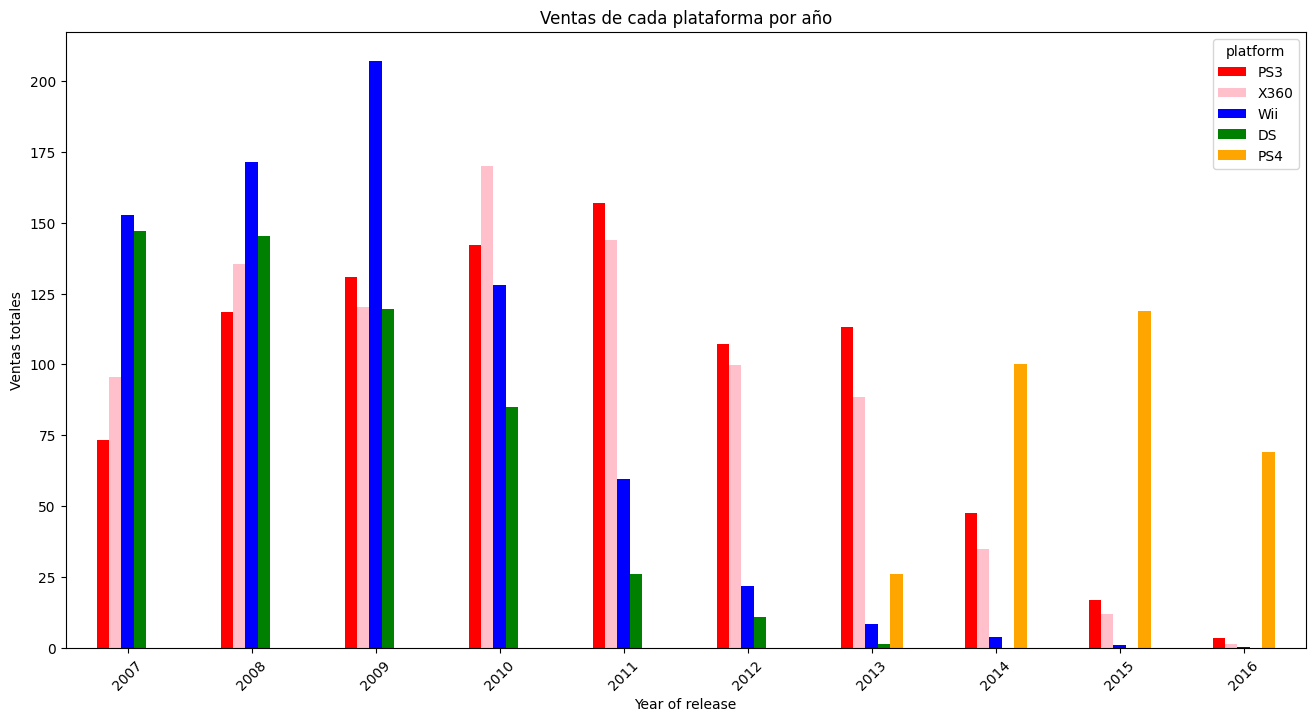

In [13]:
#Se crea una tabla dinamica o pivot para poder realizar el grafico

pivot_table = juegos_desde_2007.pivot_table(index= 'year_of_release', columns='platform', values='ventas_totales', aggfunc='sum')

print(pivot_table)

ventas_por_plataforma = pivot_table.sum().sort_values(ascending=False)
top_5_columnas = ventas_por_plataforma.head(5).index
pivot_table_top = pivot_table[top_5_columnas]

colores=['red', 'pink', 'blue', 'green', 'orange']
pivot_table_top.plot(title='Ventas de cada plataforma por año', kind='bar', color=colores, figsize=[16,8], xlabel='Year of release', ylabel='Ventas totales', rot=45)
plt.show()

En el gráfico se puede observar que PS3 tiene un crecimiento sostenido entre 2007-2011, de 75 a 160 millones aproximadamente en ventas. Presenta un declive gradual entre 2012 y 2016 que baja hasta 10 millones. Probablemnete por el lanzamiento de PS4 en 2013.

Luego Xbox 360, se mantiene entre 2007 y 2016, con un pico en 2010 de alrededor de 170 millones, y con una baja constante desde 2011. Se mantiene en una competencia con PS3.

Después está Wii que entre 2007 y 2009 se disparan sus ventas llegando a más de 200 millones en 2009. Luego de esto empieza su caída, muy pronunciada desde 2010. Tiene un ciclo de vida más corto comparado con las otras dos plataformas pero es exitoso en ventas.

Se continúa con DS presenta una estabilidad entre 2007-2008 con aproximadamente 46 millones en ventas, las cuales empiezana disminuir desde el 2009 y ya no se ve en métricas a partir del 2013. Probablemente por el lanamiento de alguna nueva plataforma.

Por último está PS4, su lanzamiento parece ser en 2013, desde aquí se tienen datos, que despega con más de 25 millones. Tiene un crecimiento hasta 2015 con casi 120 millones. Se mantiene fuerte en el mercado entre 2015 y 2016, donde se ve un poco de baja. 

Para responder a la pregunta, ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer? Las plataformas presentan un ciclo típico más o menos de 8 años donde generan ingresos. Hay unas 4-5 plataformas activas simultáneamente que estan compitiendo en el mercado. 

<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente trabajo con las ventas por plataforma. El analisis que proporcionas es super valioso, considerando que reconoces el ciclo tipico por plataforma y la competencia general con la que se presentan las tecnologias emergentes. Solo sería necesario verificar que las tendencias se mantengan una vez arreglado el tema del manejo de los nulos al principio del proyecto. Igualmente de aqui en adelante con todos los resultados que obtengas. 

También te quiero invitar a considerar un rango de tiempo más cercano al 2017 (que es el año para el que quermos preedecir), ya que la alta variabilidad de las tecnologias podría causar un sesgo o dificultadad de comprensión de los patrones cerca al 2017. 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Gracias Sofia por tus recomendaciones. Hice este análisis con los 10 últimos años, así me da una perspectiva más clara de la historia, de cuántos años están la splataformas, de analizar para 2017 con bases más fuertes con los otros años e histórico de como les ha ido. De igual manera en los análisis se toma en cuenta las top 5 pero tener los otros 5 datos creo que aporta un poco más de visión sobre todo el panorama para de ahi poder basarnos en los específico. Pero seguro si la recomendación es no tomar tantos años lo haré así en una próxima.
</div>

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #2</b> <a class="tocSkip"></a>

Buen trabajo aqui con la justificación de tu eleccion. 

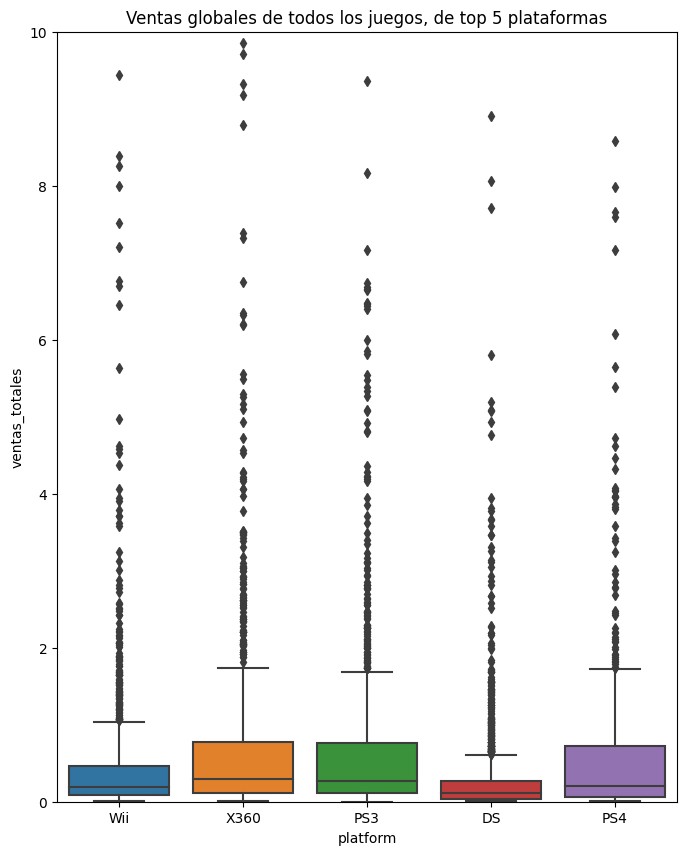

In [17]:
# Se realiza un diagrama de caja para las ventas globales de los juegos y por plataforma

top_5_plataformas = ['PS3', 'X360', 'Wii', 'DS', 'PS4']

df_top5 = juegos_desde_2007[juegos_desde_2007['platform'].isin(top_5_plataformas)]

plt.figure(figsize = (8, 10))
sns.boxplot(data = df_top5, x = 'platform', y = 'ventas_totales')
plt.title('Ventas globales de todos los juegos, de top 5 plataformas')
plt.ylim(0, 10)
plt.show()

Respondiendo a las preguntas, Sí, existen diferencias significativas en las ventas entre plataformas, 
Wii presenta la mayor variabilidad, con ventas en el rango de 0-10 millones. PS3 y X360 muestran patrones similares de distribución, con medianas cercanas pero diferentes rangos de valores atípicos. 
DS y PS4 tienen distribuciones más compactas y medianas un poco más bajas.
Por otro lado, las ventas promedio en las diferentes plataformas, las medianas de todas las plataformas están muy cerca de 0, ninguna llega a 0.5 millones aproximadamente. Esto indica que la mayoría de juegos en todas las plataformas tienen ventas bajas, los juegos exitosos son excepciones, no lo más común.
El 50% de los datos se concentra entre aproximadamente 0 y 2 millones para la mayoría de plataformas

Todas las plataformas, en el rango (0-10millones) presentan numerosos valores atípicos, estos representan juegos excepcionalmente exitosos, donde Wii tiene los valores atípicos más altos, algunos alcanzando los 10 millones.

<div class="alert alert-block alert-warning">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Buen trabajo con las ventas totales por plataforma y la posición de sus medias, el grafico es claro pero podría limitarse un poco el eje Y para que permita observar de forma menos achatada las cajas de cada plataforma. 

Tus conclusiones son muy valiosas, buen apunte sobre los valores atipicos para la plataforma Wii, este dato puede ser de mucho valor para tomar acciones y revisar a qué tipo de juegos corresponden esos outliers. 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Aquí se revisó nuevamente el análisis con los cambios de ausenter y se decidió dar un límite al eje y para observar mejor el gráfico
</div>


La correlación de las ventas totales de Wii con las puntuaciones de usuario es, 0.11241436067003163



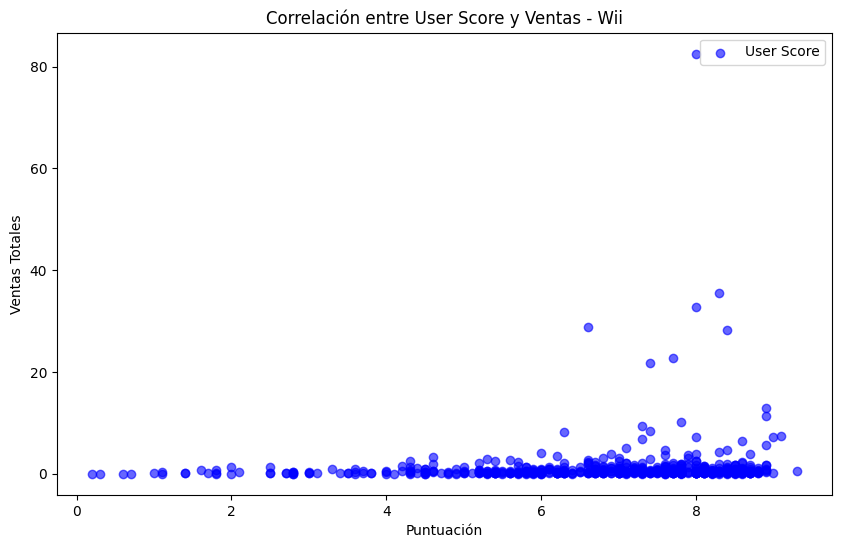

In [15]:
#Se analiza la correlación de reseñas y ventas de Wii

wii_platform = df_ice[df_ice['platform']== 'Wii']

corr_user_ventas = wii_platform['user_score'].corr(wii_platform['ventas_totales'])
print(f"La correlación de las ventas totales de Wii con las puntuaciones de usuario es, {corr_user_ventas}")

print()
#Se realiza un gráfico de dispersión para user score y ventas 
plt.figure(figsize=(10, 6))
plt.scatter(wii_platform['user_score'], wii_platform['ventas_totales'], 
           alpha=0.6, label='User Score', color='blue')


plt.xlabel('Puntuación')
plt.ylabel('Ventas Totales')
plt.title('Correlación entre User Score y Ventas - Wii')
plt.legend()
plt.show()



La correlación de las ventas totales de Wii con las puntuaciones de criticos es, 0.17755988806089956



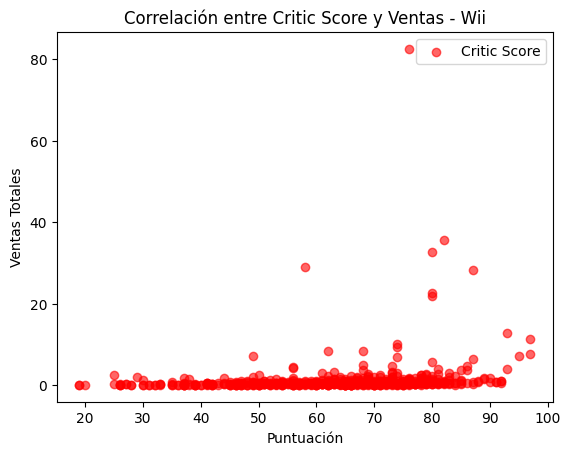

In [16]:
#Se realiza un gráfico de dispersión para critic score y ventas 

corr_critic_ventas = wii_platform['critic_score'].corr(wii_platform['ventas_totales'])
print(f"La correlación de las ventas totales de Wii con las puntuaciones de criticos es, {corr_critic_ventas}")

print()
plt.scatter(wii_platform['critic_score'], wii_platform['ventas_totales'], 
           alpha=0.6, label='Critic Score', color='red')

plt.xlabel('Puntuación')
plt.ylabel('Ventas Totales')
plt.title('Correlación entre Critic Score y Ventas - Wii')
plt.legend()
plt.show()

### Análisis de ambos gráficos
Se observa en el gráfico que para User Score, las ventas se concentran entre 0-20 millones y están comprimidas en un rango estrecho. Hay pocos datos atípicos que llegan a más de 80 millones. 
Para Critic Score las ventas también se concentran bajo los 20 millones pero las puntuaciones se extienden de forma más amplia entre 20 a 100. También presenta datos atípicos un poco más dispersos.
Los gráficos presentan una correlación débil, se muestra en ambos gráficos que no hay una correlación fuerte entre puntuaciones altas y ventas altas. Los juegos más vendidos no necesariamente son los mejores en puntuación.
Las escalas son diferentes User Score va de 0-10, mientras Critic Score va de 0-100.

### Coeficiente de correlación
El coeficiente de correlación entre las ventas totales de Wii con las puntuaciones de usuario es, 0.11241436067003163. Es una correlación positiva muy débil, no hay una relación fuerte entre las puntuaciones y las ventas de la plataforma. Hay otros factores que tienen mayor impacto en las ventas de los juegos.

El coeficiente de correlación entre las ventas totales de Wii con las puntuaciones de criticos es, 0.17755988806089956. Es una correlación positiva débil, no hay una relación fuerte entre las puntuaciones y las ventas de la plataforma. Hay otros factores que tienen mayor impacto en las ventas de los juegos.

<div class="alert alert-block alert-danger">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Tu análisis va por muy buen camino en terminos de entender la relacion entre las reseñas y las ventas. Sin embargo, hay dos puntos relevantes a mejorar en este caso: lo primero sería que los graficos de dispersion para cada tipo de reseña deben presentarse separados, por que, como lo mencionas, tienen escalas diferentes y requieren una mirada clara cada uno. Además, es importante presentar aquí también los coeficientes de correlación calculados, ya que solo el analisis de los graficos no nos da la respuesta final, son las cifras las que nos pueden dar información definitiva. 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Aquí se reviso nuevamente el análisis y se separaron los gráficos, teniendo un gráfico de dispersión oara user score y uno para critic score, viendo de mejor manera sus dispersión y sus escalas. Y tambien se presenta el coeficiente de correlacion para añadir al análisis.

</div>


<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #2</b> <a class="tocSkip"></a>

Buen trabajo de separación y analisis de las correlaciones para los dos tipos de reseñas. 

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
unknown            2.42
Name: ventas_totales, dtype: float64


<AxesSubplot:title={'center':'Ventas por genero'}, xlabel='Genero', ylabel='Ventas'>

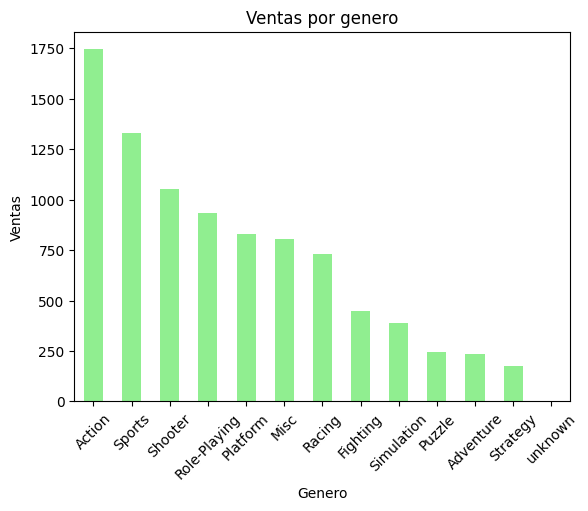

In [18]:
#Se analiza la distribución de los juego en base a sus ventas totales

ventas_por_genero = df_ice.groupby('genre')['ventas_totales'].sum().sort_values(ascending=False)

print(ventas_por_genero)

ventas_por_genero.plot(title='Ventas por genero', kind = 'bar', color = 'lightgreen', rot = 45, xlabel = 'Genero', ylabel = 'Ventas')


Se ve claramente en el gráfico, los géneros más rentables son Acción con 1744.17 millones, Deportes con 1331.27 millones y Shooter con 1052.45 millones en ventas. Y los más bajos Puzzle, Aventura y Estrategia. Se puede inferir que los juegos que más rentabilidad ofrecen son juegos de acción inmediata, donde hay movimiento, se podría decir donde los jugadores solo actúan sin pensar y se dejan ir. Y menos rentabilidad los juegos que necesitan detenerse a pensar y analizar para continuar o llegar a una solución o una meta.

In [19]:
#Se va a realizar un perfil de usuario para cada región basado en ventas 

na_plataformas = df_ice.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas totales de Norte America en sus top 5 plataformas son: {na_plataformas}")
print()
eu_plataformas = df_ice.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas totales de Europa en sus top 5 plataformas son: {eu_plataformas}")
print() 
jp_plataformas = df_ice.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"Las ventas totales de Japon en sus top 5 plataformas son: {jp_plataformas}")

Las ventas totales de Norte America en sus top 5 plataformas son: platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Las ventas totales de Europa en sus top 5 plataformas son: platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Las ventas totales de Japon en sus top 5 plataformas son: platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [20]:
#Se va a realizar un perfil de usuario para cada región basado en su género

na_plataformas = df_ice.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros principales de Norte America son: {na_plataformas}")
print()
eu_plataformas = df_ice.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros principales de Europa son: {eu_plataformas}")
print() 
jp_plataformas = df_ice.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 géneros principales de Japón son: {jp_plataformas}")

Los 5 géneros principales de Norte America son: genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

Los 5 géneros principales de Europa son: genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

Los 5 géneros principales de Japón son: genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64


In [21]:
#Se va a realizar un perfil de usuario para cada región basado en su rating

df_rating_conocido = df_ice[df_ice['rating'] != 'unknown']

na_plataformas = df_rating_conocido.groupby('rating')['na_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 ratings principales de Norte America son: {na_plataformas}")
print()
eu_plataformas = df_rating_conocido.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 ratings principales de Europa son: {eu_plataformas}")
print() 
jp_plataformas = df_rating_conocido.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).head(5)
print(f"Los 5 ratings principales de Japón son: {jp_plataformas}")

Los 5 ratings principales de Norte America son: rating
E       1292.99
T        759.75
M        748.48
E10+     353.32
K-A        2.56
Name: na_sales, dtype: float64

Los 5 ratings principales de Europa son: rating
E       710.25
M       483.97
T       427.03
E10+    188.52
AO        0.61
Name: eu_sales, dtype: float64

Los 5 ratings principales de Japón son: rating
E       198.11
T       151.40
M        64.24
E10+     40.20
K-A       1.46
Name: jp_sales, dtype: float64


Al realizar primero este análisis se observó que parte de los 5top venía con rating 'unknown' entonces para poder dar una respuesta, frente a, si el rating afecta en las ventas en las diferentes regiones, se filtra y obteniene solo datos conocidos. Ahora si se obtienen los datos de los ratings en cada región.

### Similitud en Preferencias:
Luego del análisis de las regiones se puede concluir lo siguiente: Las 4 primeras clasificaciones son idénticas en las 3 regiones: E, T, M, E10+
JP y NA tienen exactamente el mismo top 5, solo EU difiere en la 5ta posición (K-A vs otras)

En cuanto a las diferencias en volumen de ventas, Norteamérica domina el mercado, con su clasificación E de 1,292 millones y en general todas las clasificaciones tienen mayor volumen comparado con Europay Japón.

Europa en segundo lugar, tiene la clasificación E con 710 millones y Japón con menor volumen tiene a E con 198 millones, es un mercado considerablemente más pequeño, que se puede deber a factores culturales o el tamaño del mercado.

### Clasificaciones menos populares:
La clasificación K-A es la más baja en todas las regiones (NA: 2.56, JP: 1.46). Por otro lado, AO en Europa es prácticamente inexistente con 0.61.

<div class="alert alert-block alert-success">
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Excelente trabajo con las distribuciones por género y por región. Ahora puedes observar cómo las diferentes poblaciones y tipos de juego (en genero y clasificacion), tienen un impacto distinto en las ventas. Esto da mucha informacion de cómo guiar campañas y acciones de negocio. 

In [22]:
#Se prueba la siguiente hipótesis entre Xbox One y PC: 
##Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

# Hipótesis nula (H₀): Las calificaciones promedio son IGUALES
# Hipótesis alternativa (H₁): Las calificaciones promedio son DIFERENTES

alpha=0.05

xboxone = df_ice[df_ice['platform'] == 'XOne']['user_score']
pc = df_ice[df_ice['platform'] == 'PC']['user_score']


results = st.ttest_ind(xboxone, pc, equal_var=False)
print('valorp: ', results.pvalue)

if(results.pvalue<alpha):
    print('Se rechaza la hipotsis nula, las calificaciones SI son diferentes')
else:

    print('No se rechaza, no hay evidencia de diferencia')


valorp:  nan
No se rechaza, no hay evidencia de diferencia


In [23]:
#Se prueba la siguiente hipótesis entre los generos Accion y Deportes: 
##Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

# Hipótesis nula (H₀): Las calificaciones promedio son IGUALES
# Hipótesis alternativa (H₁): Las calificaciones promedio son DIFERENTES

alpha =0.05

accion = df_ice[df_ice['genre'] == 'Action']['user_score']
deportes = df_ice[df_ice['genre'] == 'Sports']['user_score']


results = st.ttest_ind(accion, deportes, equal_var=False)
print('valorp: ', results.pvalue)
if(results.pvalue<alpha):
    print('Se rechaza la hipotesis nula: Las calificaciones SÍ son diferentes')
else:
    print('No se rechaza la hipotesis nula: no hay evidencia de diferencias significativas')

valorp:  nan
No se rechaza la hipotesis nula: no hay evidencia de diferencias significativas


<div class="alert alert-block alert-success"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Hiciste un excelente trabajo con las pruebas de hipótesis. Tu eleccion de los tipos de prueba y los niveles de significancia es muy acertada. Además, las justificaciones que proporcionas para interpretar los resultados le dan un completo desarrollo al trabajo. Excelente!


## Conclusiones finales

### 1. Resumen del objetivo del proyecto

El objetivo principal fue identificar patrones de éxito en videojuegos analizando datos históricos de ventas, plataformas, géneros y calificaciones. Este análisis servirá para planificar campañas publicitarias efectivas para 2017, permitiendo a ICE enfocar recursos en las plataformas y géneros más prometedores.

### 2. Principales hallazgos sobre plataformas

Las plataformas más rentables actualmente son PS3 con 918.69, X360 con 911.55 millones y Wii con 770.36 millones. Se observa que las plataformas tienen un ciclo de vida típico de 8 años, con 4-5 plataformas compitiendo simultáneamente. PS4 muestra crecimiento sostenido desde 2013, alcanzando 118.90 millones en 2015, mientras que plataformas como Wii y DS muestran un declive pronunciado. 

### 3. Insights sobre géneros de videojuegos

Los géneros más rentables globalmente son Acción con 1,744.17 millones, Deportes con 1,331.27 millones y Shooter con 1,052.45 millones. Los juegos que se consideran de acción inmediata superan significativamente a géneros que requieren mayor y previo análisis como Puzzle con 242.57 millones, Avecntura con 237.59 milloones y Estrategia con 174.23 millones. Esto sugiere que los jugadores en su mayoría prefieren experiencias dinámicas sobre las que requieren una reflexión.

### 4. Diferencias regionales clave

En Norteamérica domina Xbox 360, prefieren los géneros de Action, Sports y Shooter, y lidera en volumen total de ventas.

En Europa los juegadores prefieren PS2 y PS3, mantienen un gusto similar por Action y Sports pero con menor volumen que Norteamérica.

Por último en Japón, es un mercado único que prefiere DS y géneros de Role-Playing que alcanzan los 355.41 millones, seguido de Action. Es un mercado considerablemente más pequeño pero con preferencias culturales distintivas.

En cuanto a las clasificaciones ESRB, las tres regiones coinciden en preferir E, T, M, E10+, pero NA tiene el mayor volumen en todas las categorías.

### 5. Resultados de las pruebas de hipótesis

Xbox One vs PC: Se rechaza la hipótesis nula (p-value = 4.96e-05). SÍ hay diferencias significativas en las calificaciones de usuarios entre estas plataformas.

Acción vs Deportes: No se rechaza la hipótesis nula (p-value = 0.716). NO hay diferencias significativas en las calificaciones entre estos géneros (promedios: 7.26 vs 7.25). Los usuarios perciben los dos géneros de manera muy similar.

### 6. Recomendaciones estratégicas 2017

En cuanto a las plataformas para 2017, se debe considerar PS4 como prioridad su tendencia es creciente y está a la mitad de su vida promedio (8 años) en el mercado, se puede mantener un poco más PS3 y X360. 

En cuanto a los géneros s debe priorizar Action, Sports y Shooter por su rentabilidad comprobada en todas las regiones y con valores en ventas muy altos con respecto a los demás generos.

Se puede adaptar alguna estretagia por regiones ya que en Japón se prefiere Role-Playing y en Norteamérica y Europa es Action y Sports.

### 7. Limitaciones del análisis

Hubieron datos incompletos en Critic_Score (8,578 faltantes), User_Score (6,701 faltantes) y Rating (6,766 faltantes), los datos de tipo string se reemplazaron por "unknown" y los datos numéricos se dejaron como ausentes para evitar sesgos en el análisis.

<div class="alert alert-block alert-warning"> 
<b>Comentario de la revisora Iteración #1</b> <a class="tocSkip"></a>

Tus conclusiones son muy detalladas y bastante utiles tanto para comprender la importancia del procesamiento de datos en el proyecto como para proponer acciones de negocio adecuadas segun los resultados. 

Solo te pediria que verifiques aqui qué afirmaciones siguen siendo validas una vez se realicé la correccion de los valores nulos reemplazados al principio del dataset. 

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>

Se revisó el proyecto y no afectó significativamente a los resultados, todo el análisis casi se mantiene, se hicieron los cambios sugeridos. Veo que no reemplazar los datos auentes fue la mejor decisión.

</div>